In [18]:
%load_ext line_profiler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing
import sklearn.linear_model as lm
import src.random_matrix as rm
import src.stat_arb as sa
import src.dim_reduction as dr
import statsmodels.api as sm
import math
import importlib

PATH = '/data/hawfinch/clarkson/data/us_eq/cache'

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


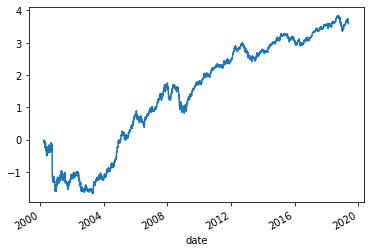

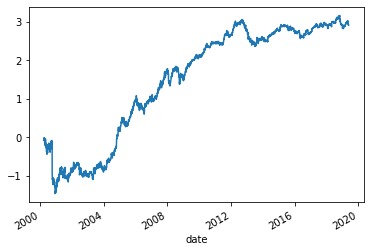

In [647]:
df = pd.read_pickle('{}/log_returns_cleaned.pkl'.format(PATH))

df = df.dropna(thresh=len(df)*.99, axis=1)
df = df.dropna(axis=0)
spy = df['SPY']
df = df.drop('SPY', axis=1)
pred = pd.DataFrame(lm.LinearRegression(fit_intercept=False).fit(spy.values.reshape(-1,1), df.values).predict(spy.values.reshape(-1, 1)), index=df.index, columns=df.columns.values)
df['AAPL'].cumsum().plot()
plt.subplots()

# df_500 = df.loc[:, df_500.index]
df_excess = df - pred
df_excess['AAPL'].cumsum().plot()

In [648]:
df_500 = pd.read_pickle('{}/cleaned_multi.pkl'.format(PATH))
df_500 = df_500['volume'].loc[:,df.columns.values,:].unstack(1).mean().sort_values()[-500:]
df_500 = df_excess.loc[:, df_500.index.values]
df_500

ticker,ELY,HPT,AVY,WETF,PKG,UGI,NNN,DAR,MD,WWW,...,EBAY,F,GE,CSCO,INTC,MSFT,XLF,BAC,AAPL,IRM
date,,,,,,,,,,,,,,,,,,,,,
2000-03-29,-0.008979,0.005011,0.024792,-0.053586,-0.000981,0.024697,0.011381,-0.038780,-0.018240,-0.000917,...,-0.118784,0.005798,0.042740,-0.024887,-0.029800,0.026096,-0.009109,-0.031223,-0.024312,0.008528
2000-03-30,0.001538,0.006316,0.049510,-0.033082,0.016010,0.025637,0.014521,0.016976,0.020167,0.004494,...,0.060917,0.059240,-0.007566,-0.010733,-0.016437,-0.018381,0.023942,0.003313,-0.059375,0.008659
2000-03-31,-0.011725,-0.006284,-0.008741,0.010782,0.057015,0.055839,0.008420,-0.011349,0.009799,-0.086545,...,-0.176811,-0.027952,-0.032486,0.034272,0.023948,0.015508,-0.008245,0.013820,0.064595,0.002806
2000-04-03,-0.006028,-0.000260,-0.032520,-0.119177,-0.023521,-0.035791,-0.023118,-0.045056,-0.021295,0.076646,...,-0.213076,0.016133,0.027475,-0.065758,-0.017295,-0.162440,0.039604,0.047682,-0.024946,-0.015319
2000-04-04,-0.000341,0.020449,0.006086,-0.012838,-0.017460,0.039676,0.000306,0.120837,0.005023,-0.014546,...,0.162646,0.051612,-0.036114,0.012226,0.025526,-0.017888,-0.031019,-0.012250,-0.037859,-0.005727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-17,-0.013502,-0.000411,-0.004853,-0.007553,0.001413,-0.001839,0.001270,-0.013591,-0.015292,-0.003379,...,-0.001947,-0.003106,-0.005672,0.015872,-0.005999,0.000161,0.001779,0.003482,0.001420,-0.003629
2019-05-20,-0.034196,-0.006460,-0.010921,-0.012193,-0.040749,-0.009085,-0.008095,-0.004290,-0.016351,-0.001962,...,-0.001043,0.006727,-0.004663,0.002530,-0.021732,-0.007541,0.009761,0.010381,-0.024489,-0.009896
2019-05-21,-0.020708,0.000059,0.007009,-0.011250,0.014915,-0.000701,-0.000702,-0.005026,0.021123,0.024048,...,-0.010565,-0.014315,-0.001960,-0.002547,0.009163,-0.004110,-0.001345,-0.003885,0.009140,0.000361


Registered Corr_pca_252
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000
Iteration: 1100
Iteration: 1200
Iteration: 1300
Iteration: 1400
Iteration: 1500
Iteration: 1600
Iteration: 1700
Iteration: 1800
Iteration: 1900
Iteration: 2000
Iteration: 2100
Iteration: 2200
Iteration: 2300
Iteration: 2400
Iteration: 2500
Iteration: 2600
Iteration: 2700
Iteration: 2800
Iteration: 2900
Iteration: 3000
Iteration: 3100
Iteration: 3200
Iteration: 3300
Iteration: 3400
Iteration: 3500
Iteration: 3600
Iteration: 3700
Iteration: 3800
Iteration: 3900
Iteration: 4000
Iteration: 4100
Iteration: 4200
Iteration: 4300
Iteration: 4400
Iteration: 4500
Iteration: 4600
Iteration: 4700
Iteration: 4800


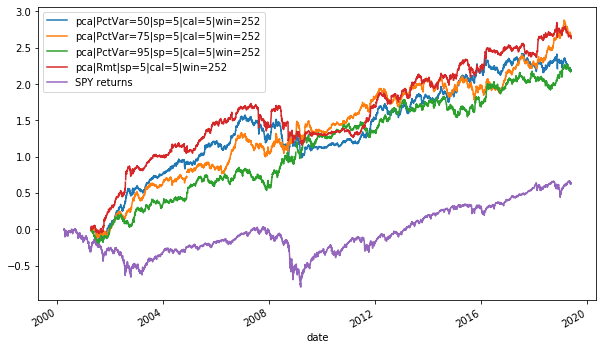

In [828]:
importlib.reload(dr)
importlib.reload(sa)
    
def backtest(df_lr, strats, df_exc=None, benchmark=None):    
    i = 0
    tfmrs = sa.Transforms()
    for strat in strats:
        strat.register_transforms(tfmrs)
        strat.setup(df_lr)
    for index, row in df_lr.iterrows():
        for strat in strats:
            strat.calibrate_portfolio(df_lr, index, tfmrs)
        i += 1
        if i % 100 == 0 and i > 250: print('Iteration: {}'.format(i))

    for strat in strats:
        strat.pnl_reconciliation(df_lr, filter_outliers=True)
    rets = [strat.cum_ret for strat in strats]
    rets = pd.concat(rets, axis=1) * benchmark.std()
    rets.plot(figsize=(10,6))
    if benchmark is not None:
        benchmark.cumsum().plot(label='SPY returns')
    plt.legend()
    plt.savefig('last_run.png')


# strats = [sa.StArbFm(dr.SPca(k=59), cal_freq=5, window_len=60),
w = 252
corr=False
# strats = [sa.StArbFm(dr.RPca(), cal_freq=5, window_len=w),]
strats = [sa.StArbFm(dr.Pca(pct_var=50, corr=True), cal_freq=5, window_len=w), \
          sa.StArbFm(dr.Pca(pct_var=75, corr=True), cal_freq=5, window_len=w), \
          sa.StArbFm(dr.Pca(pct_var=95, corr=True), cal_freq=5, window_len=w), \
#           sa.StArbFm(dr.Pca(pct_var=10, corr=True), cal_freq=5, window_len=60),

# strats = [sa.StArbFm(dr.SPca(alpha=0.1), cal_freq=5, window_len=w),]
    sa.StArbFm(dr.Pca(rmt=True, corr=True), cal_freq=5, window_len=w)]

backtest(df_500, strats, df_excess, benchmark=spy)
# %lprun -f dr.RPca.fit backtest(df_500, strats, df_excess, benchmark=spy)


[RPca|sp=5|cal=5|win=252    0.32
dtype: float64, array([0.05801149])]


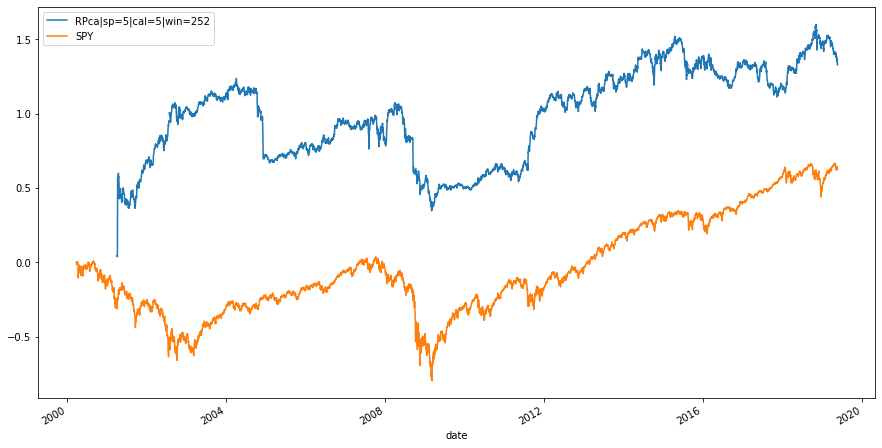

In [834]:
for strat in strats2:
    print(sharpe_ratio_test(strat.lr))
# strats2 = np.copy(strats)
# rpca = strats[0]
# strats2
# rpca.pnl_reconciliation(df_500, filter_outliers=True)

(rpca.cum_ret * spy.std()).plot()
spy.cumsum().plot(label='SPY', figsize=(15, 8))
plt.legend()
plt.savefig('rpca_cum_perf.png')

# print(rpca.fm.S.shape)
# rpca.lr.plot()
# rpca.lr.hist(bins=50)
# print('skew: {}'.format(rpca.lr.skew()))
# print('kurt: {}'.format(rpca.lr.kurtosis()))

# plt.show()
# plt.plot(pd.Series(rpca.fm.S[:,1]).ewm(span=5).mean())
# plt.plot(pd.Series(rpca.fm.L[:,1]).ewm(span=5).mean())
# last = rpca.trading_days[-1]
# ix = df.index.get_loc(last)
# plt.show()
# df_500.iloc[ix-252:ix, 1].cumsum().plot()
# plt.show()
# (df_500.iloc[ix-252:ix, 1] - rpca.fm.L[:,1]).cumsum().plot()

# #     strat.pnl_reconciliation(df_500, filter_outliers=True)

pca|Rmt|sp=5|cal=5|win=60   2004-11-19
dtype: datetime64[ns]


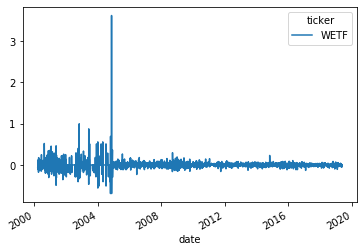

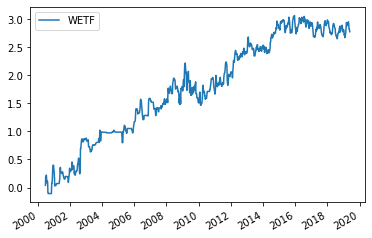

In [543]:
ix = strats[1].lr.loc['2004'].idxmax()
print(ix)
err_ticker = strats[1].portfolios.loc[ix].abs().idxmax(axis=1)
df.loc[:, err_ticker].plot()
(strats[0].portfolios.loc[:, err_ticker] * -1).cumsum().plot()

In [23]:
from scipy.stats import norm

def sharpe_ratio_test(log_ret):
    '''
    Implements the sharpe ratio test ion Opdyke 2007
    :param log_ret: daily log-returns
    :return: annualised sharpe ratio and p-value
    '''
    sharpe = log_ret.mean()/log_ret.std()
    sharpe_annualised = sharpe * np.sqrt(252)    
    T = len(log_ret)
    std = log_ret.std()
    skew = ((log_ret - log_ret.mean()) ** 3).mean()
    kurtosis = ((log_ret - log_ret.mean()) ** 4).mean()    
    sharpe_se = np.sqrt((1 + sharpe ** 2/ 4 * (kurtosis - 1) - sharpe * skew) / T)    
    p_value = 1 - norm.cdf(sharpe/sharpe_se)    
    return [sharpe_annualised.round(2), p_value]

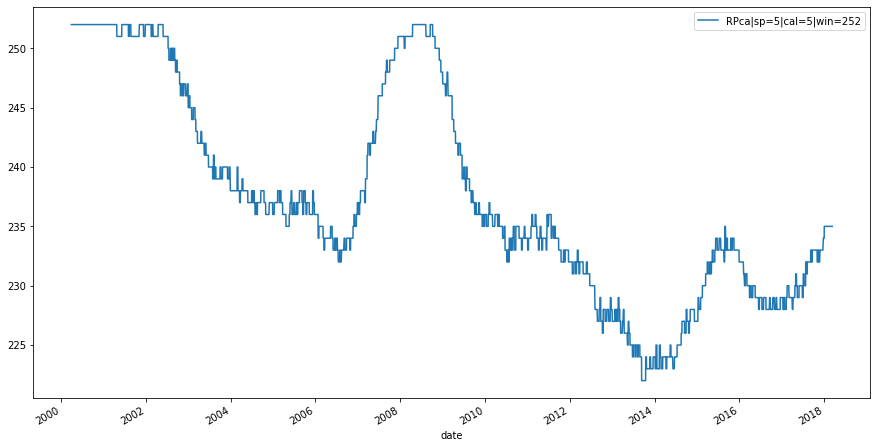

In [837]:
pcs_df = pd.DataFrame(rpca.n_pcs, index=df_500.index, columns=[rpca.id])#pd.concat([pd.DataFrame(strat.n_pcs, index=df.index, columns=[strat.id]) for strat in strats], axis=1)
pcs_df.iloc[:-300].plot(figsize=(15, 8))
# pcs_df.iloc[:-300].plot(figsize=(10, 6))
plt.savefig('dim_rpca.png')

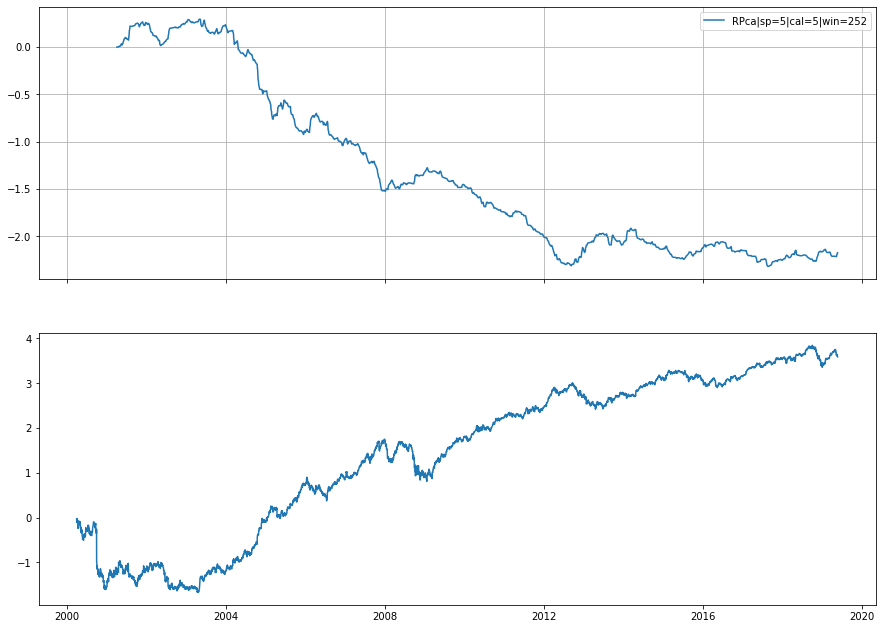

In [768]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15, 11))
for strat in strats:
    ax[0].plot((strat.portfolios['AAPL']).cumsum(), label=strat.id)
ax[1].plot(df['AAPL'].cumsum())
ax[0].grid()
ax[0].legend()
fig.savefig('aapl_resid.png')

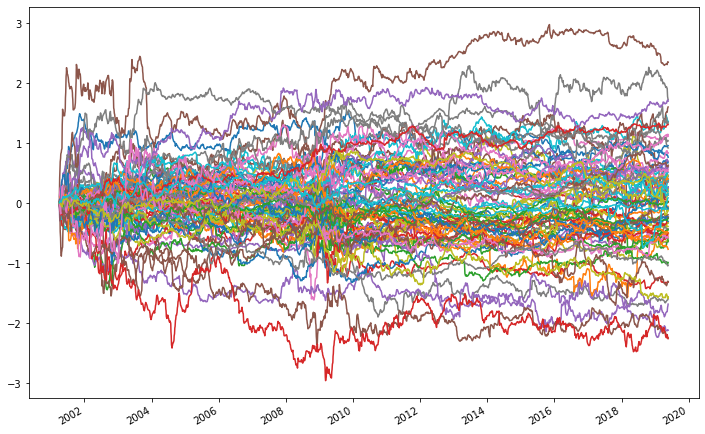

In [678]:
(strats[-1].portfolios.iloc[:, 20:100] * -1).cumsum().plot(legend=False, figsize=(12, 8))
plt.savefig('resids.png')

The following cell contains code for simulating a dataset to show that the method is able to recover the residual in a simulated case where we know what the residual should be:

In [ ]:
n = df.shape[0]
p = df.shape[1]
residuals = sm.tsa.arma_generate_sample(ar=[1], ma=[1, -0.95], nsample=(n, p))
# residuals = np.random.normal(0,1,size=(n,p))

# Gaussian returns + mean reverting residuals.
test_prices = np.array([np.random.normal(0,1) * np.ones(p) for i in range(n)]) + residuals
test_prices = pd.DataFrame(test_prices, index=df.index, columns=df.columns.values)
test_prices['AAPL'].plot()

In [ ]:
rand = pd.DataFrame(np.random.normal(size=df.shape), index=df.index, columns=df.columns)
backtest(rand, strats, df_excess, benchmark=spy)

In [21]:
# def bt(df_lr, df_exc=None, benchmark=None):
#     pca = PCA(n_components=0.50)
#     returns = np.zeros(len(df_lr))
#     i = 0
#     for index, row in df_lr.iloc[60:].iterrows():
#         ix = df_lr.index.get_loc(index)
#         window = df_lr.iloc[ix-60:ix]
#         fr = pca.fit_transform(window)
#         models = lm.LinearRegression(fit_intercept=False).fit(fr, window)
#         weights = -(window - models.predict(fr)).ewm(span=5).mean().iloc[-1]
#         returns[i] = weights.values.dot(row.values)
#         if i % 500 == 0: print(i)
#         i+= 1
#     return returns
# r = bt(df, df_excess, benchmark=spy)
from scipy import stats

def bt(df_lr, df_exc=None, benchmark=None):
    scaler = StandardScaler()
    pca = PCA(n_components=0.50)
    corr_pca = Pipeline([('s', scaler), ('pca', pca)])
    returns = np.zeros(len(df_lr))
    i = 0
    for index, row in df_lr.iloc[60:].iterrows():
        ix = df_lr.index.get_loc(index)
        window = df_lr.iloc[ix-60:ix]
        win_cen = pd.DataFrame(scale(window, with_mean=True, with_std=False),
                               index=window.index, columns=window.columns.values)
        fr = pca.fit_transform(win_cen)
#         fr = np.matmul(window.values, pca.components_.T)
        models = lm.LinearRegression(fit_intercept=False).fit(fr, win_cen)
        weights = -1 * (win_cen - models.predict(fr)).ewm(span=5).mean().iloc[-1]
        returns[i] = weights.values.dot(row.values)
        if i % 500 == 0: print(i)
        i+= 1
    print('i: {} | len(returns): {}'.format(i, len(returns)))
    return returns[:i]
rsp = bt(df, df_excess, benchmark=spy)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
i: 4753 | len(returns): 4813
